<a href="https://colab.research.google.com/github/Oktavian19/ML_2025/blob/main/JS09/JS09_Praktikum2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.datasets import make_classification

X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

X = np.absolute(X)

X = np.round(X, 2) * 100

X = X.astype(int)

print(X)
print(y)

[[ 51   9]
 [140 181]
 [ 47  77]
 [213 148]
 [ 81  99]
 [138  93]
 [148 202]
 [ 77 156]
 [213 200]
 [169 194]
 [155 163]
 [ 85  75]
 [135 137]
 [142 122]
 [196 176]
 [ 49  46]
 [108 106]
 [ 76  32]
 [135 111]
 [ 85 108]
 [137 110]
 [ 61  72]
 [108 118]
 [ 62 135]
 [ 78 123]
 [ 49 123]
 [138  76]
 [140  82]
 [108  85]
 [ 21 105]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


In [2]:
import pandas as pd

y_new = y.reshape(len(y), 1)

data = np.concatenate((X, y_new), axis=1)

nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

df = pd.DataFrame(data, columns=nama_kolom)

df.head()

,Fitur 1,Fitur 2,Label
0,51,9,0
1,140,181,0
2,47,77,0
3,213,148,0
4,81,99,0


In [3]:
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

df_label = df.copy()

df_label['Label'] = df_label['Label'].map(labels)

df_label.head()

,Fitur 1,Fitur 2,Label
0,51,9,Kelas B
1,140,181,Kelas B
2,47,77,Kelas B
3,213,148,Kelas B
4,81,99,Kelas B


/tmp/ipython-input-2700686111.py:9: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  class_a = gb.get_group('Kelas A')
/tmp/ipython-input-2700686111.py:10: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  class_b = gb.get_group('Kelas B')


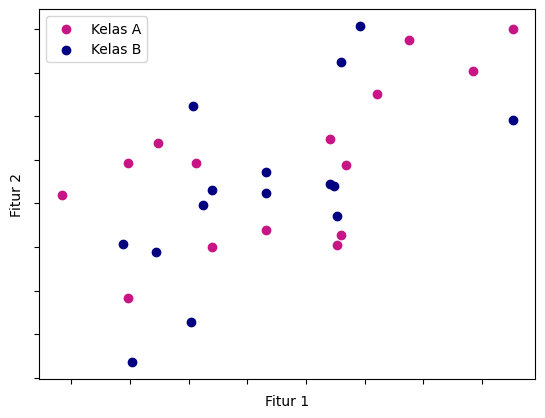

In [4]:
import matplotlib.pyplot as plt

colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

In [5]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

mnb = MultinomialNB()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

mnb.fit(X_train, y_train)

y_train_pred = mnb.predict(X_train)

acc_train = accuracy_score(y_train, y_train_pred)

y_test_pred = mnb.predict(X_test)

acc_test = accuracy_score(y_test, y_test_pred)

print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.5238095238095238
Hasil akurasi data test: 0.3333333333333333


In [6]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_train_pred_gnb = gnb.predict(X_train)

acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

y_test_pred_gnb = gnb.predict(X_test)

acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.6190476190476191
Hasil akurasi data test (Gaussian): 0.3333333333333333
